In [1]:
import pandas as pd

In [2]:
# Load dataset
churn = pd.read_csv('C:/Documents/customer_churn.csv')

In [4]:
# Check the dataset shape
churn.shape

(7048, 21)

In [5]:
# Check data types and non-null counts
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7048 entries, 0 to 7047
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7040 non-null   object
 1   gender            7048 non-null   object
 2   SeniorCitizen     7048 non-null   int64 
 3   Partner           7048 non-null   object
 4   Dependents        7048 non-null   object
 5   tenure            7048 non-null   int64 
 6   PhoneService      7048 non-null   object
 7   MultipleLines     7048 non-null   object
 8   InternetService   7040 non-null   object
 9   OnlineSecurity    7048 non-null   object
 10  OnlineBackup      7048 non-null   object
 11  DeviceProtection  7039 non-null   object
 12  TechSupport       7048 non-null   object
 13  StreamingTV       7048 non-null   object
 14  StreamingMovies   7048 non-null   object
 15  Contract          7048 non-null   object
 16  PaperlessBilling  7048 non-null   object
 17  PaymentMethod 

In [6]:
# Summary statistics for numerical columns
churn.describe()

,SeniorCitizen,tenure
count,7048.000000,7048.000000
mean,0.162032,32.375851
std,0.368506,24.559625
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [7]:
# Check unique values in categorical columns
churn['gender'].value_counts()

gender
Male      3551
Female    3486
male         6
female       5
Name: count, dtype: int64

In [8]:
# Check missing values per column
churn.isnull().sum()

customerID          8
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     8
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    9
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
Churn               0
dtype: int64

In [9]:
churn = churn[churn['customerID'].notnull()]

In [10]:
churn = churn.dropna(subset=['customerID'])

In [12]:
churn['InternetService'] = churn['InternetService'].fillna(churn['InternetService'].mode()[0])
churn['DeviceProtection'] = churn['DeviceProtection'].fillna(churn['DeviceProtection'].mode()[0])

In [13]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

In [14]:
churn['TotalCharges'] = churn['TotalCharges'].fillna(0.0)

In [15]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
# Check for duplicates:
churn.duplicated().sum()

5

In [20]:
duplicates = churn[churn.duplicated()]
print(duplicates)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
5     9237-HQITU  Female              0      No         No       2   
58    8769-KKTPH  Female              0     Yes        Yes      63   
4111  2650-GYRYL    Male              0     Yes        Yes      33   
6853  5060-TQUQN    Male              0     Yes        Yes      30   
7039  0639-TSIQW  Female              0      No         No      67   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
5             Yes            No     Fiber optic                   No  ...   
58            Yes           Yes     Fiber optic                  Yes  ...   
4111          Yes            No              No  No internet service  ...   
6853          Yes           Yes     Fiber optic                   No  ...   
7039          Yes           Yes     Fiber optic                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
5                      No                   N

In [21]:
# Drop the duplicate rows
churn = churn.drop_duplicates()

In [22]:
churn.duplicated().sum()

0

In [23]:
# Standardize the gender
churn['gender'] = churn['gender'].str.strip().str.capitalize()

In [24]:
# check to confirm
churn['gender'].value_counts()

gender
Male      3552
Female    3483
Name: count, dtype: int64

In [37]:
# Check for other columns with text fomatting errors
for col in text_columns:
    print(f"\nColumn: {col}")
    print(churn[col].value_counts(dropna=False))


Column: customerID
customerID
7590-VHVEG    1
7036-ZZKBD    1
5956-YHHRX    1
5365-LLFYV    1
5855-EIBDE    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7035, dtype: int64

Column: gender
gender
Male      3552
Female    3483
Name: count, dtype: int64

Column: Partner
Partner
No     3637
Yes    3398
Name: count, dtype: int64

Column: Dependents
Dependents
No     4927
Yes    2108
Name: count, dtype: int64

Column: PhoneService
PhoneService
Yes    6348
No      675
yes       7
no        5
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  3388
Yes                 2967
No phone service     680
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    3097
DSL            2414
No             1524
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No                     3488
Yes                    2012
No internet service    1521
yes                  

In [38]:
# Capitalize the phoneservice and onlinesecurity
churn['PhoneService'] = churn['PhoneService'].str.strip().str.capitalize()
churn['OnlineSecurity'] = churn['OnlineSecurity'].str.strip().str.capitalize()

In [41]:
# To confirm
churn['PhoneService'].value_counts()

PhoneService
Yes    6355
No      680
Name: count, dtype: int64

In [43]:
churn['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3493
Yes                    2018
No internet service    1524
Name: count, dtype: int64

In [45]:
# Check data types and non-null counts
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7035 entries, 0 to 7047
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7035 non-null   object 
 1   gender            7035 non-null   object 
 2   SeniorCitizen     7035 non-null   int64  
 3   Partner           7035 non-null   object 
 4   Dependents        7035 non-null   object 
 5   tenure            7035 non-null   int64  
 6   PhoneService      7035 non-null   object 
 7   MultipleLines     7035 non-null   object 
 8   InternetService   7035 non-null   object 
 9   OnlineSecurity    7035 non-null   object 
 10  OnlineBackup      7035 non-null   object 
 11  DeviceProtection  7035 non-null   object 
 12  TechSupport       7035 non-null   object 
 13  StreamingTV       7035 non-null   object 
 14  StreamingMovies   7035 non-null   object 
 15  Contract          7035 non-null   object 
 16  PaperlessBilling  7035 non-null   object 
 17  

In [46]:
churn.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7035,7035,7035.000000,7035,7035,7035.000000,7035,7035,7035,7035,...,7035,7035,7035,7035,7035,7035,7035,7035,7035.000000,7035
unique,7035,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,1584,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,20.05,NaN,No
freq,1,3552,NaN,3637,4927,NaN,6355,3388,3097,3493,...,3100,3468,2807,2782,3872,4165,2362,61,NaN,5167
mean,NaN,NaN,0.162047,NaN,NaN,32.354797,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2276.966745,NaN
std,NaN,NaN,0.368520,NaN,NaN,24.562230,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2267.531075,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.775000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1390.850000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3783.200000,NaN


In [49]:
# Check for each column
for col in churn.columns:
    print(f"\nColumn: {col}")
    print(churn[col].unique())


Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column: gender
['Female' 'Male']

Column: SeniorCitizen
[0 1]

Column: Partner
['Yes' 'No']

Column: Dependents
['No' 'Yes']

Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 58 49 25 69 52 71 21 12 30 47 72 17 27  5
 46 11 70 63 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68 32 43
 55 36 41  6  4 33 67 23 57 61 14 16 20 53 40 59 24 44 19 54 51 37 26  0
 39]

Column: PhoneService
['No' 'Yes']

Column: MultipleLines
['No phone service' 'No' 'Yes']

Column: InternetService
['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
['No' 'Yes' 'No internet service']

Column: OnlineBackup
['Yes' 'No' 'No internet service']

Column: DeviceProtection
['No' 'Yes' 'No internet service']

Column: TechSupport
['No' 'Yes' 'No internet service']

Column: StreamingTV
['No' 'Yes' 'No internet service']

Column: StreamingMovies
['No' 'Yes' 'No internet service']

Column: Contract
['Month-to-month' 'O

In [50]:
(churn == '').sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [51]:
churn.describe()

,SeniorCitizen,tenure,TotalCharges
count,7035.000000,7035.000000,7035.000000
mean,0.162047,32.354797,2276.966745
std,0.368520,24.562230,2267.531075
min,0.000000,0.000000,0.000000
25%,0.000000,9.000000,393.775000
50%,0.000000,29.000000,1390.850000
75%,0.000000,55.000000,3783.200000
max,1.000000,72.000000,8684.800000


In [52]:
churn['Churn'].value_counts(normalize=True)

Churn
No     0.734471
Yes    0.265529
Name: proportion, dtype: float64

In [53]:
# Create tenure groups for better categorization
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 Months'
    elif tenure <= 24:
        return '12-24 Months'
    elif tenure <= 48:
        return '24-48 Months'
    elif tenure <= 60:
        return '48-60 Months'
    else:
        return '60+ Months'

In [56]:
churn['tenure_group'] = churn['tenure'].apply(tenure_group)
churn['tenure_group'] = churn['tenure_group'].astype('category')

In [58]:
# Check the tenure and tenure group created above
churn[['tenure', 'tenure_group']].head(10)

,tenure,tenure_group
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
6,8,0-12 Months
7,22,12-24 Months
8,10,0-12 Months
9,28,24-48 Months
10,62,60+ Months


In [60]:
# Save the cleaned dataset
churn.to_csv('customer_churn_cleaned.csv', index=False)
print("Cleaned data saved to customer_churn_cleaned.csv")

Cleaned data saved to customer_churn_cleaned.csv


In [63]:
# Average tenure by churn status
print(churn.groupby('Churn')['tenure'].mean())

Churn
No     37.555642
Yes    17.968951
Name: tenure, dtype: float64


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

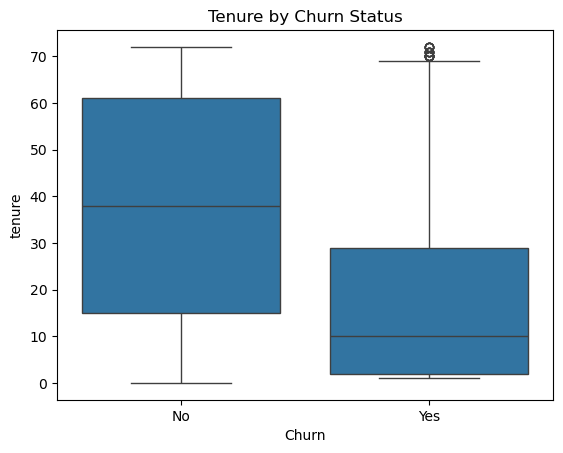

In [66]:
sns.boxplot(data=churn, x='Churn', y='tenure')
plt.title('Tenure by Churn Status')
plt.show()

In [74]:
# Average monthly charges by churn status
print(churn.groupby('Churn')['MonthlyCharges'].mean())

Churn
No     61.264128
Yes    74.426018
Name: MonthlyCharges, dtype: float64


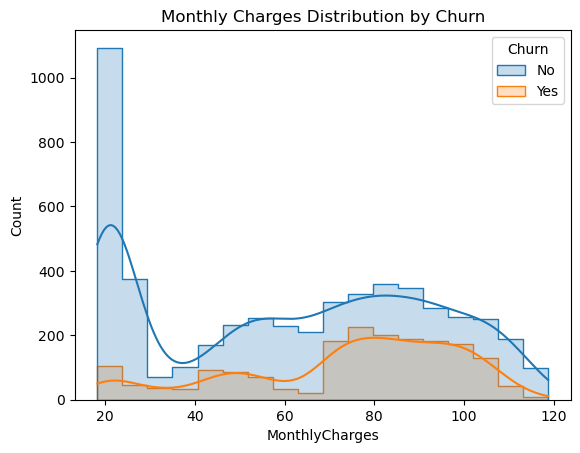

In [76]:
sns.histplot(data=churn, x='MonthlyCharges', hue='Churn', kde=True, element='step')
plt.title('Monthly Charges Distribution by Churn')
plt.show()

In [77]:
# Churn rate by InternetService
print(churn.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack())

Churn                  No       Yes
InternetService                    
DSL              0.809859  0.190141
Fiber optic      0.581531  0.418469
No               0.925853  0.074147


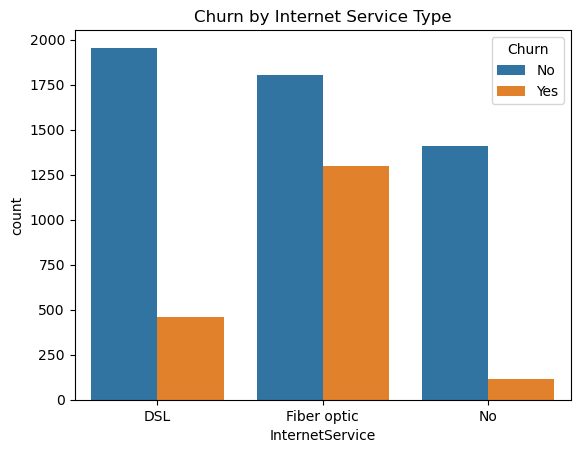

In [78]:
sns.countplot(data=churn, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service Type')
plt.show()

In [79]:
# Convert to Yes/No for readability
churn['SeniorCitizen'] = churn['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [80]:
# Churn rates for senior citizens
print(churn.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack())

Churn                No       Yes
SeniorCitizen                    
No             0.763698  0.236302
Yes            0.583333  0.416667


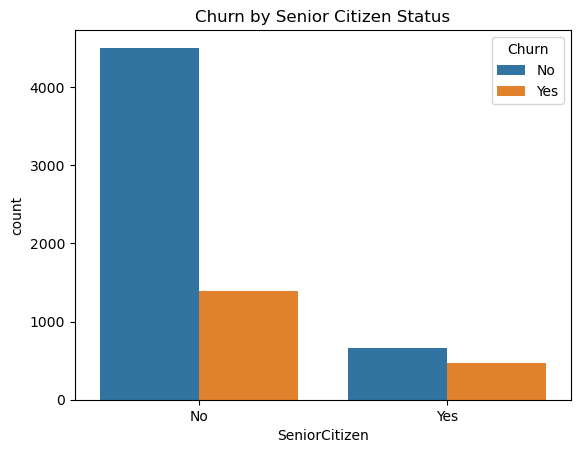

In [81]:
sns.countplot(data=churn, x='SeniorCitizen', hue='Churn')
plt.title('Churn by Senior Citizen Status')
plt.show()